<a href="https://colab.research.google.com/github/saivasanthg/ClassificationonIrisDataset/blob/main/IrisDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [70]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


In [58]:
# Reading the data
data=pd.read_csv('/content/iris.data')
data

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica


<ipython-input-59-1482e9142c65>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmatrix=data.corr()


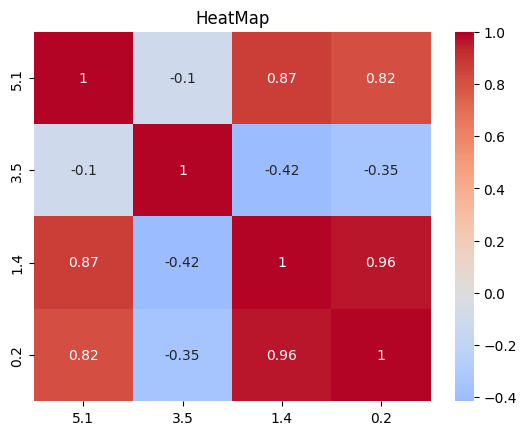

In [59]:
# Checking the correlation between features
corrmatrix=data.corr()
sns.heatmap(corrmatrix,annot=True,cmap="coolwarm",center=0)
plt.title("HeatMap")
plt.show()

In [60]:
# Checking the unique labels in the target set

unique_values = data['Iris-setosa'].unique()
print(unique_values)

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [61]:
# Assuming 'data' is your DataFrame
target = 'Iris-setosa'  # Target class to encode

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the target variable
data['target'] = label_encoder.fit_transform(data[target])


In [62]:
data_=data.drop('Iris-setosa',axis=1)

In [63]:
data_

,5.1,3.5,1.4,0.2,target
0,4.9,3.0,1.4,0.2,0
1,4.7,3.2,1.3,0.2,0
2,4.6,3.1,1.5,0.2,0
3,5.0,3.6,1.4,0.2,0
4,5.4,3.9,1.7,0.4,0
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,2
145,6.3,2.5,5.0,1.9,2
146,6.5,3.0,5.2,2.0,2
147,6.2,3.4,5.4,2.3,2


In [64]:
data_['target'].isnull().sum()

0

<Axes: xlabel='target', ylabel='count'>

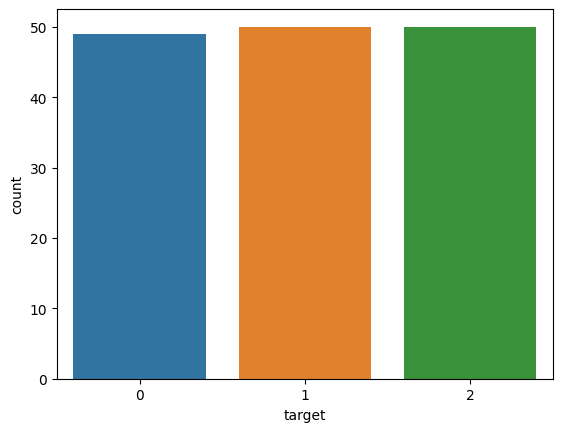

In [65]:
# Visualising the target variable
sns.countplot(data= data_, x='target')


In [66]:
# Setting up the training and testing split
X=data_.drop('target',axis=1)
Y=data_['target']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.4,random_state=42)

In [67]:
# Applying Decision Trees and evaluating
dt=DecisionTreeClassifier()
dt.fit(X_train,Y_train)
y_pred=dt.predict(X_test)
acc=accuracy_score(Y_test,y_pred)
print("Accuracy: ",acc*100)

Accuracy:  90.0


In [68]:
# Applying Logistic Regression and evaluating
model = LogisticRegression()
model.fit(X_train, Y_train)
y_pred2 = model.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy: ",acc*100)

Accuracy:  90.0


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [69]:
# Applying Support Vector Classifiers and evaluating
clf = SVC(kernel='linear')
clf.fit(X_train, Y_train)
y_pred3 = clf.predict(X_test)
accuracy2 = accuracy_score(Y_test, y_pred)
print("Accuracy: ",acc*100)


Accuracy:  90.0
